In [1]:
#importer des bibliothèques 
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
random.seed(42)

In [2]:
# Exploration des données 
df = pd.read_excel('DONNEES - AB test.xlsx')
df

,send_date,member_id,ab_group,member_registration_date,member_age_group,segmentation,bool_open,bool_click,bool_conversion
0,2023-11-21,56501568,A,2022-03-16,NaN,G,0,0,0
1,2023-11-24,6007387,A,2010-07-29,>= 50,A,1,1,1
2,2023-11-21,54828940,A,2021-09-19,< 25,G,0,0,0
3,2023-11-23,58126789,A,2022-10-15,NaN,H,0,0,0
4,2023-11-22,9210438,A,2011-09-26,>= 50,G,1,1,0
...,...,...,...,...,...,...,...,...,...
100710,2023-11-24,46485665,B,2020-12-14,NaN,E,0,0,0
100711,2023-11-20,22833956,B,2015-05-23,NaN,H,0,0,0
100712,2023-11-20,60961706,B,2023-09-08,25 - 34,H,0,0,0
100713,2023-11-22,58596674,B,2022-11-23,35 - 49,F,0,0,0


Groupe A = 50% de la population : groupe sur lequel ke nouveau format est testé
Groupe B = 50% de la population : groupe temoin, avec le format actuel

In [3]:
df.shape

(100715, 9)

In [4]:
print("Is NA?")
print(df.isna().sum())
print("Is NULL?")
print(df.isnull().sum())

Is NA?
send_date                       0
member_id                       0
ab_group                        0
member_registration_date        0
member_age_group            34184
segmentation                    0
bool_open                       0
bool_click                      0
bool_conversion                 0
dtype: int64
Is NULL?
send_date                       0
member_id                       0
ab_group                        0
member_registration_date        0
member_age_group            34184
segmentation                    0
bool_open                       0
bool_click                      0
bool_conversion                 0
dtype: int64


In [5]:
df.describe(include='all')

<ipython-input-5-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')
<ipython-input-5-174ba9bf1a5c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,send_date,member_id,ab_group,member_registration_date,member_age_group,segmentation,bool_open,bool_click,bool_conversion
count,100715,1.007150e+05,100715,100715,66531,100715,100715.000000,100715.000000,100715.000000
unique,7,NaN,2,6100,4,12,NaN,NaN,NaN
top,2023-11-22 00:00:00,NaN,B,2010-01-01 00:00:00,35 - 49,H,NaN,NaN,NaN
freq,14498,NaN,50875,289,21854,38827,NaN,NaN,NaN
first,2023-11-19 00:00:00,NaN,NaN,2006-10-11 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2023-11-25 00:00:00,NaN,NaN,2023-10-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.927145e+07,NaN,NaN,NaN,NaN,0.337368,0.074299,0.037244
std,NaN,1.936400e+07,NaN,NaN,NaN,NaN,0.472814,0.262258,0.189359
min,NaN,1.153861e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,2.293835e+07,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [6]:
df.send_date = pd.to_datetime(df.send_date, format ="%Y/%m/%d")

In [7]:
df['Jour_send_date'] = df['send_date'].dt.day_name()

In [8]:
Jours = {'Tuesday' : 'Mardi',  'Wednesday': 'Mercredi',  'Thursday': 'Jeudi',  'Friday' : 'Vendredi', 'Monday': 'Lundi',  'Saturday' : 'Samedi' }

In [9]:
df['Jour_send_date'] = df['Jour_send_date'].map(Jours)
df

,send_date,member_id,ab_group,member_registration_date,member_age_group,segmentation,bool_open,bool_click,bool_conversion,Jour_send_date
0,2023-11-21,56501568,A,2022-03-16,NaN,G,0,0,0,Mardi
1,2023-11-24,6007387,A,2010-07-29,>= 50,A,1,1,1,Vendredi
2,2023-11-21,54828940,A,2021-09-19,< 25,G,0,0,0,Mardi
3,2023-11-23,58126789,A,2022-10-15,NaN,H,0,0,0,Jeudi
4,2023-11-22,9210438,A,2011-09-26,>= 50,G,1,1,0,Mercredi
...,...,...,...,...,...,...,...,...,...,...
100710,2023-11-24,46485665,B,2020-12-14,NaN,E,0,0,0,Vendredi
100711,2023-11-20,22833956,B,2015-05-23,NaN,H,0,0,0,Lundi
100712,2023-11-20,60961706,B,2023-09-08,25 - 34,H,0,0,0,Lundi
100713,2023-11-22,58596674,B,2022-11-23,35 - 49,F,0,0,0,Mercredi


/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


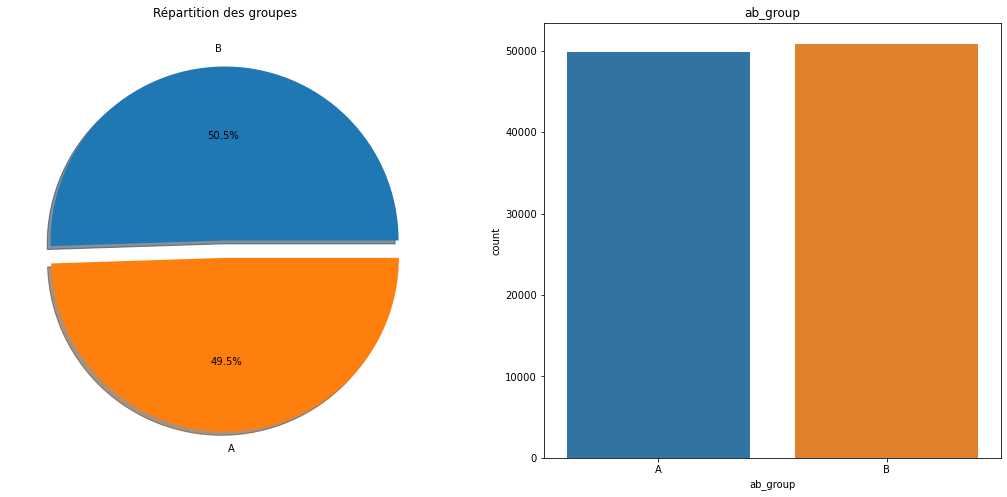

In [10]:
labels = 'B', 'A'
f,ax=plt.subplots(1,2,figsize=(18,8))
df['ab_group'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=labels,ax=ax[0],shadow=True)
ax[0].set_title('Répartition des groupes')
ax[0].set_ylabel('')
sns.countplot('ab_group',data=df,ax=ax[1])
ax[1].set_title('ab_group')
plt.show()

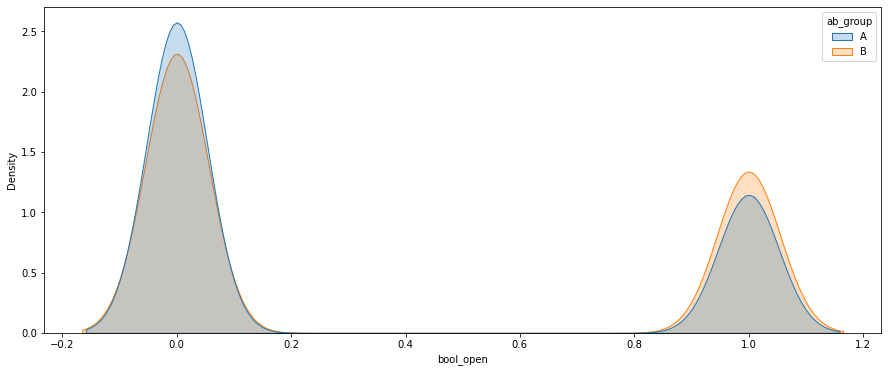

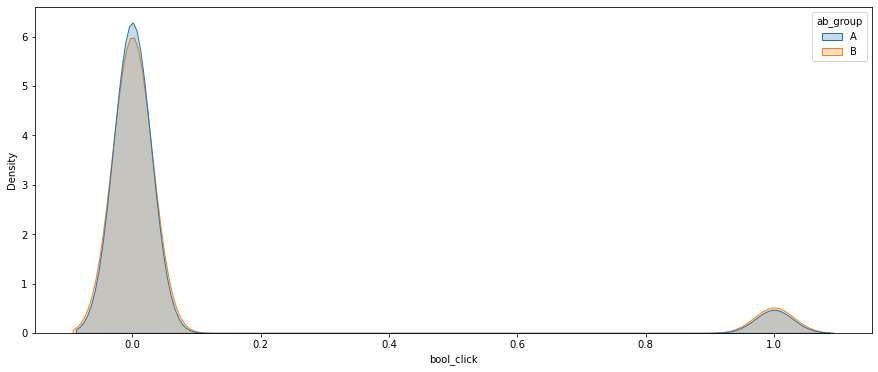

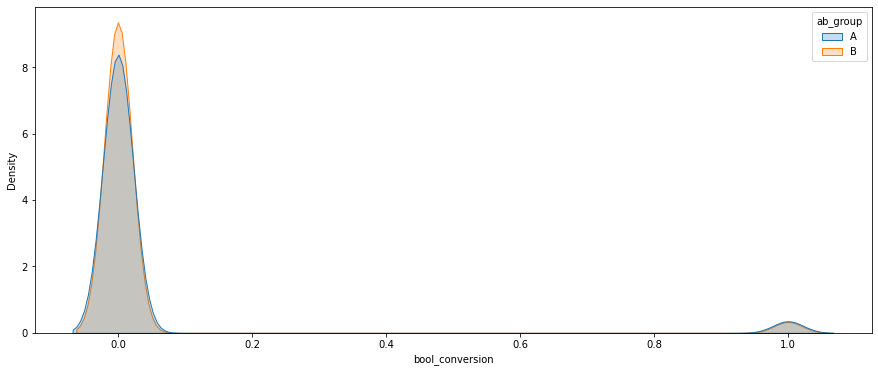

In [11]:
columns = ['bool_open','bool_click','bool_conversion']
for i in columns:
    plt.figure(figsize=(15, 6))
    sns.kdeplot(df[i],shade=True,hue=df['ab_group'])

/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elisetteossebi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

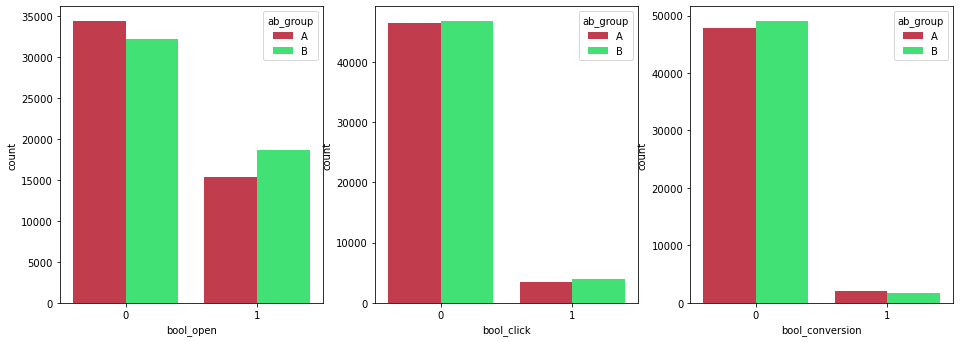

In [12]:
fig_data=['bool_open','bool_click','bool_conversion']
q=1
plt.figure(figsize=(16,12))
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(df[j],hue=df.ab_group, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

In [13]:
data = df.drop(['send_date', 'member_id','member_registration_date',
       'member_age_group', 'segmentation','Jour_send_date'], axis=1)
data

,ab_group,bool_open,bool_click,bool_conversion
0,A,0,0,0
1,A,1,1,1
2,A,0,0,0
3,A,0,0,0
4,A,1,1,0
...,...,...,...,...
100710,B,0,0,0
100711,B,0,0,0
100712,B,0,0,0
100713,B,0,0,0


In [14]:
data.corr()

,bool_open,bool_click,bool_conversion
bool_open,1.000000,0.397045,0.275647
bool_click,0.397045,1.000000,0.694245
bool_conversion,0.275647,0.694245,1.000000


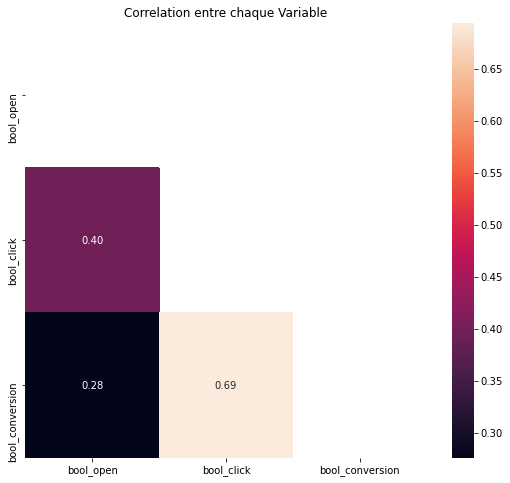

In [15]:
data_corr = data.corr()
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 8))
ax = sns.heatmap(data_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation entre chaque Variable")
plt.show()

Nous pouvons observer une forte corrélation entre le membre qui clique dans le mail et le membre qui a acheté sur le site à la suite de son clic. 

In [16]:
data.groupby("ab_group").agg(['sum',"mean","std"])

bool_open                     bool_click                      \
               sum      mean       std        sum      mean       std   
ab_group                                                                
A            15342  0.307825  0.461598       3455  0.069322  0.254003   
B            18636  0.366310  0.481800       4028  0.079174  0.270013   

         bool_conversion                      
                     sum      mean       std  
ab_group                                      
A                   2009  0.040309  0.196685  
B                   1742  0.034241  0.181849

In [17]:
data['bool_conversion'].value_counts()

0    96964
1     3751
Name: bool_conversion, dtype: int64

# Mesure de la performance variable "bool_conversion"

% Not converted 96.27562925085638
% Converted 3.724370749143623


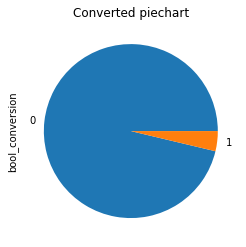

In [14]:
print("% Not converted", 100 * df["bool_conversion"].value_counts()[0]/df["bool_conversion"].value_counts().sum())
print("% Converted", 100 * df["bool_conversion"].value_counts()[1]/df["bool_conversion"].value_counts().sum())

ax = df["bool_conversion"].value_counts().plot(kind="pie")
ax.set_title('Converted piechart')
plt.show()

In [15]:
df.groupby("ab_group")["bool_conversion"].mean()*100

ab_group
A    4.030899
B    3.424079
Name: bool_conversion, dtype: float64

De ces taux de conversion, on peut conclure que le groupe A a atteint un taux de conversion plus élevé (4.030899%) par rapport au groupe B (3.424079 %). Cela indique que les email ont réussi à générer des conversions et que la campagne emailling globale a été efficace.

# Analyse statistique de la variable "bool_conversion"

bool_conversion      0     1
ab_group                    
A                47831  2009
B                49133  1742


<AxesSubplot:xlabel='ab_group'>

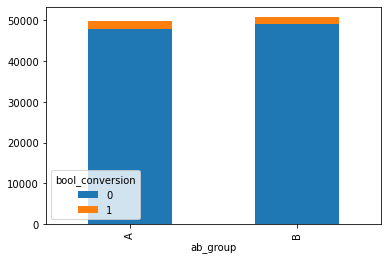

In [16]:
print(df.groupby("bool_conversion")["ab_group"].value_counts().unstack('bool_conversion'))

df.groupby("bool_conversion")["ab_group"].value_counts().unstack('bool_conversion').plot(kind="bar", stacked=True)

ab_group          A    B
Jour_send_date          
Jeudi           344  300
Lundi           246  226
Mardi           291  231
Mercredi        323  279
Samedi          294  218
Vendredi        252  236


<AxesSubplot:xlabel='Jour_send_date'>

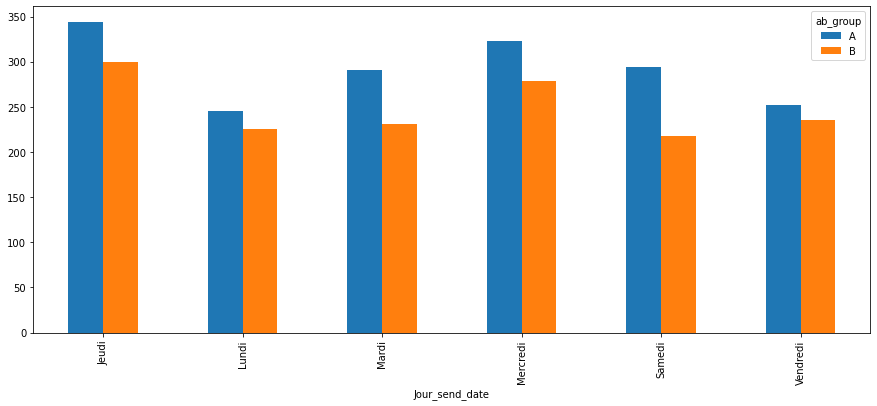

In [19]:
Ac = pd.crosstab(df['Jour_send_date'],df['ab_group'],df['bool_conversion'],aggfunc='sum')
print(Ac)
pd.crosstab(df['Jour_send_date'],df['ab_group'],df['bool_conversion'],aggfunc='sum').plot(kind='bar', figsize=(15, 6))

In [20]:
print("Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic :", Ac[['A', 'B']][:1])

Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic : ab_group          A    B
Jour_send_date          
Jeudi           344  300


Jour_send_date
Jeudi       344
Lundi       246
Mardi       291
Mercredi    323
Samedi      294
Vendredi    252
Name: bool_conversion, dtype: int64


<AxesSubplot:xlabel='Jour_send_date'>

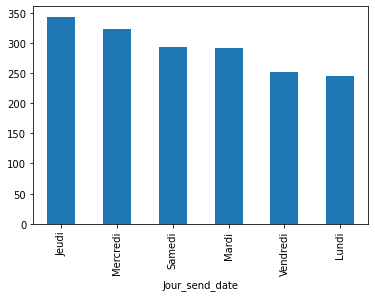

In [56]:
Ab = df.loc[df["ab_group"]=="A"].groupby("Jour_send_date")["bool_conversion"].sum()
print(Ab)
df.loc[df["ab_group"]=="A"].groupby("Jour_send_date")["bool_conversion"].sum().sort_values(ascending=False).plot(kind="bar")

In [22]:
print("Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic du groupe A :", Ab[:1])

Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic du groupe A : Jour_send_date
Jeudi    344
Name: bool_conversion, dtype: int64


Jour_send_date
Jeudi       300
Lundi       226
Mardi       231
Mercredi    279
Samedi      218
Vendredi    236
Name: bool_conversion, dtype: int64


<AxesSubplot:xlabel='Jour_send_date'>

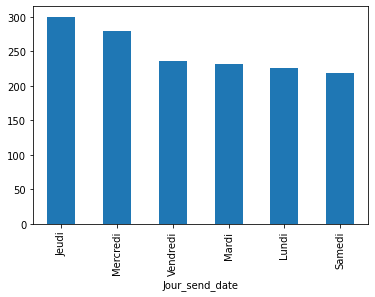

In [55]:
Ac = df.loc[df["ab_group"]=="B"].groupby("Jour_send_date")["bool_conversion"].sum()
print(Ac)
df.loc[df["ab_group"]=="B"].groupby("Jour_send_date")["bool_conversion"].sum().sort_values(ascending=False).plot(kind="bar")

In [24]:
print("Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic du groupe B :", Ac[:1])

Le jour de la semaine qui a le plus d'acaht sur le suite à la suite d'un clic du groupe B : Jour_send_date
Jeudi    300
Name: bool_conversion, dtype: int64


In [25]:
df['member_age_group'].value_counts()

35 - 49    21854
25 - 34    17363
>= 50      16917
< 25       10397
Name: member_age_group, dtype: int64

ab_group            A    B
member_age_group          
>= 50             980  844
< 25               26   33
35 - 49           308  298
25 - 34            86   75


<AxesSubplot:xlabel='member_age_group'>

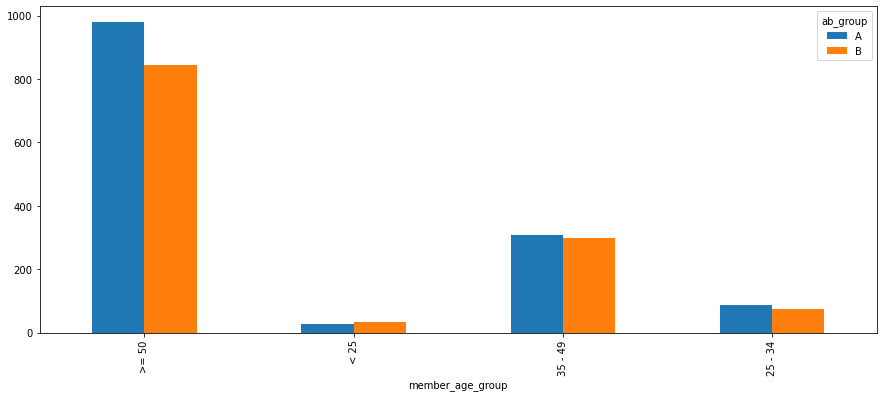

In [26]:
Ae = pd.crosstab(df['member_age_group'],df['ab_group'],df['bool_conversion'],aggfunc='sum').sort_values(by = 'member_age_group',ascending=False)
print(Ae)
pd.crosstab(df['member_age_group'],df['ab_group'],df['bool_conversion'],aggfunc='sum').sort_values(by = 'member_age_group',ascending=False).plot(kind='bar', figsize=(15, 6))

In [27]:
print("La tranche d'âge dans laquelle se situe le membre avec le meilleur taux de conversion :", Ae[:1])

La tranche d'âge dans laquelle se situe le membre avec le meilleur taux de conversion : ab_group            A    B
member_age_group          
>= 50             980  844


In [52]:
Ah = pd.crosstab(df['segmentation'],df['ab_group'],df['bool_conversion'],aggfunc='sum')
Ah.sort_values(by = 'segmentation',ascending=True)

ab_group,A,B
segmentation,,
A,113,87
B,400,389
C,212,159
D,302,254
E,208,183
F,115,97
G,550,482
H,103,84
I,0,1


<AxesSubplot:xlabel='segmentation'>

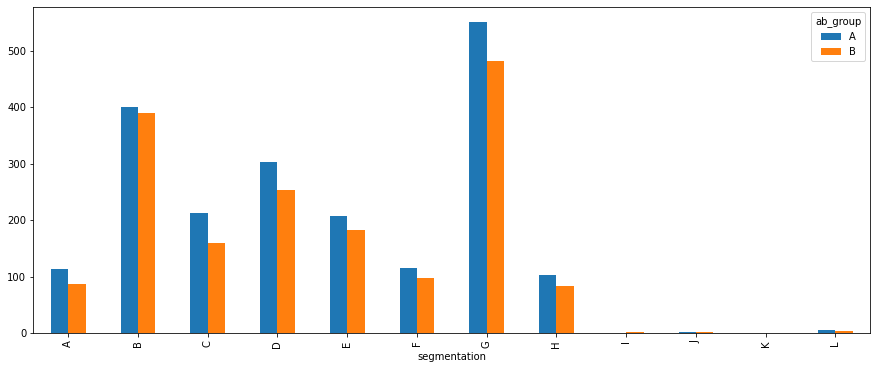

In [53]:
pd.crosstab(df['segmentation'],df['ab_group'],df['bool_conversion'],aggfunc='sum').plot(kind='bar', figsize=(15, 6))

Le segment du groupe G a le meilleurs taux de converstion